In [54]:
from __future__ import division 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.manifold import TSNE
%matplotlib inline

In [4]:
# Load in all the data 
all_sims = []
for i in range(100):
    all_sims.append( pd.read_csv('./H2/sim.s100.iter' + str(i) + '.csv', sep='\t'))

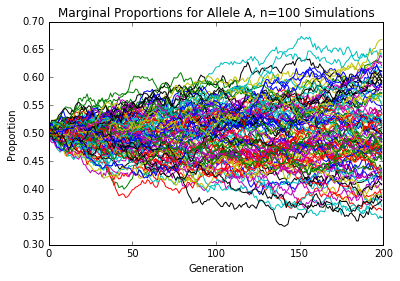

In [13]:
# Look at the spread in the margin
# This should help us get a sense of the variance on these trajectories...
for i in range(100):
    plt.plot(all_sims[i]['A'])
plt.title('Marginal Proportions for Allele A, n=100 Simulations')
plt.ylabel('Proportion')
plt.xlabel('Generation')

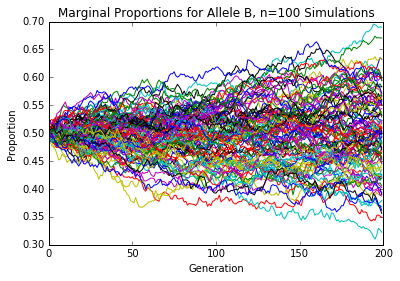

In [14]:
for i in range(100):
    plt.plot(all_sims[i]['B'])
plt.title('Marginal Proportions for Allele B, n=100 Simulations')
plt.ylabel('Proportion')
plt.xlabel('Generation')

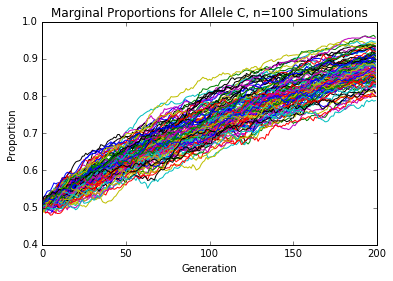

In [17]:
# Allele C is the one undergoing (weak) selection 
# The variance seem much smaller than the other plots 
for i in range(100):
    plt.plot(all_sims[i]['C'])
plt.title('Marginal Proportions for Allele C, n=100 Simulations')
plt.ylabel('Proportion')
plt.xlabel('Generation')

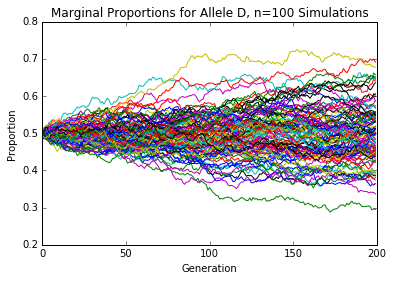

In [22]:
for i in range(100):
    plt.plot(all_sims[i]['D'])
plt.title('Marginal Proportions for Allele D, n=100 Simulations')
plt.ylabel('Proportion')
plt.xlabel('Generation')

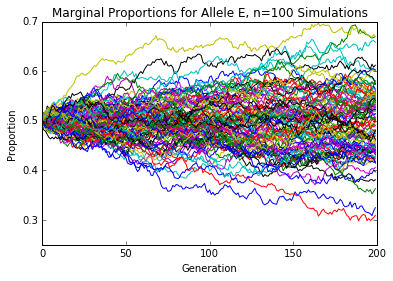

In [23]:
for i in range(100):
    plt.plot(all_sims[i]['E'])
plt.title('Marginal Proportions for Allele E, n=100 Simulations')
plt.ylabel('Proportion')
plt.xlabel('Generation')

## Some Basic EDA Visualizations
#### TODO: Add more 


In [78]:
# Here we look at the vector 
# xi = (#X1, #X2, ..., #X100), where X is the allele singleton or pair  
# Note: The entries in xi are very correlated 

# Try to visualize the scatter plot of the xi's using the t-sne embedding 

# t-SNE embedding - this turned out to perform terribly...
combined_data = np.zeros((15, 100, 40)) # 15 different types of columns, e.g. A, AE, etc. 
                                        # 100 simulations, time points sampled each 10 generations
                                        # 10 generations, 200 / 5 = 40 


# First columns is a useless 'unnamed' column...
allele_names = all_sims[0].columns.values[1:]

for i, name in enumerate(allele_names):
    for j in range(100):
        combined_data[i, j, :] = all_sims[j][name][::5]

In [79]:
alle_a_data = combined_data[0, :, :]

In [80]:
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
a_embedding = model.fit_transform(alle_a_data) 

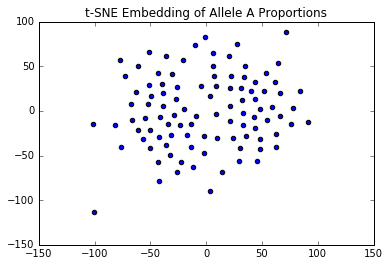

In [81]:
plt.scatter(a_embedding[:, 0], a_embedding[:, 1])
plt.title('t-SNE Embedding of Allele A Proportions')

In [82]:
# If we embed all (15) different singleton and pairwise frequencies, what sort of spatial 
# correlations exists from the t-SNE embeddeding?

all_embeddings = np.zeros((15, 100, 2))
for i in range(15):
    model = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    all_embeddings[i, :, :] = model.fit_transform(combined_data[i, :, :]) 

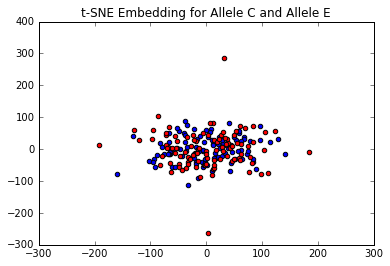

In [92]:
# Plot embeddings, with a different color for each category 
cols = ['b', 'g', 'r', 'c', 'm']

plt.scatter(all_embeddings[2, :, 0], all_embeddings[0, :, 1], c=cols[0])
plt.scatter(all_embeddings[4, :, 0], all_embeddings[5, :, 1], c=cols[2])
plt.title('t-SNE Embedding for Allele C and Allele E') # horrible embedding  